---

# Exploratory Data Analysis (EDA) for TellCo User Overview

## Situational Overview

I'm working for a wealthy investor interested in purchasing TellCo, a mobile service provider in the Republic of Pefkakia. The investor specializes in undervalued assets and relies on data-driven decisions to identify growth opportunities. My analysis of TellCo's telecommunication data will help determine whether TellCo is a valuable purchase and provide insights into customer behavior and potential profitability. 

This EDA will explore the dataset derived from TellCo's xDR records, representing the customers' activities on the network. It will inform further analysis and guide business recommendations.

---

## Setup

First, let's set up the environment by importing necessary libraries and loading the data.

In [1]:
# Import necessary libraries and modules
import os
import sys

sys.path.insert(0, os.path.dirname(os.getcwd()))

from scripts.conect_db import conn_db
from scripts.tellCo_analysis import TellCoEDA

# Suppress FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Connecting to a PostgreSQL Database

In [2]:
db = conn_db(
    database='TellCo_db',
    user='postgres',
    password='SH36@jit',
    host='localhost',
    port='5432'
)
db.connect()


Connected to TellCo_db database successfully.


### Fetching Data and Initializing Data Analysis


In [3]:
# Fetch data as a DataFrame
df = db.fetch_data("SELECT * FROM xdr_data;")
db.disconnect()
# Initialize the TelecomEDA class
tellCo_data = TellCoEDA(df)
df.head()

TellCo_db connection closed.


,Bearer Id,Start,Start ms,End,End ms,Dur. (s),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


## `df.describe()` Overview

The `df.describe()` function provides a summary of statistics for numerical columns in a DataFrame. 

### Key Metrics:

- **Count**: Number of non-null entries.
- **Mean**: Average value.
- **Std**: Standard deviation (spread of data).
- **Min**: Minimum value.
- **25%**: 25th percentile (Q1).
- **50%**: Median (50th percentile or Q2).
- **75%**: 75th percentile (Q3).
- **Max**: Maximum value.


In [4]:
df.describe()

,Bearer Id,Start ms,End ms,Dur. (s),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


### Identifying Columns with High Percentage of Missing Values



In [5]:
# Calculate the percentage of missing values in each column
missing_values = df.isnull().sum() / len(df)

# Filter the columns where more than 10% of the values are missing
high_missing_values = missing_values[missing_values > 0.1]

print(high_missing_values)

Avg RTT DL (ms)                             0.185525
Avg RTT UL (ms)                             0.185412
TCP DL Retrans. Vol (Bytes)                 0.587636
TCP UL Retrans. Vol (Bytes)                 0.644322
HTTP DL (Bytes)                             0.543156
HTTP UL (Bytes)                             0.545396
Nb of sec with 125000B < Vol DL             0.650249
Nb of sec with 1250B < Vol UL < 6250B       0.619289
Nb of sec with 31250B < Vol DL < 125000B    0.623903
Nb of sec with 37500B < Vol UL              0.868354
Nb of sec with 6250B < Vol DL < 31250B      0.588776
Nb of sec with 6250B < Vol UL < 37500B      0.745615
dtype: float64


## `wrangle()` Method Overview

The `wrangle()` method in the `TellCoEDA` class performs data wrangling tasks to prepare the dataset for analysis.

### Functionality:

1. **Drop Features with High Null Values:**
   - Removes columns with a significant amount of missing data.
   - **Example Columns Dropped**: TCP DL Retrans. Vol (Bytes), HTTP DL (Bytes), etc.

2. **Drop Low and High Cardinality Categorical Variables:**
   - Removes columns with low or high cardinality, which might not be useful for analysis.
   - **Example Column Dropped**: Last Location Name.

3. **Handle Outliers:**
   - Calculates the 10th and 90th percentiles (Q1 and Q3) for numeric columns.
   - Identifies outliers using the IQR (Interquartile Range) method.
   - Removes rows with outlier values in specific numeric columns.

4. **Fill Missing Values:**
   - Replaces missing values with the mean of the respective columns.

5. **Return Cleaned DataFrame:**
   - Returns the cleaned and preprocessed DataFrame.


In [4]:
# data wrangling
tellCo_data.wrangle()

c:\Users\Coop\OneDrive\Desktop\10 Acedamy\week-2\scripts\tellCo_analysis.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[numeric_cols] = self.df[numeric_cols].fillna(self.df[numeric_cols].mean())


,Bearer Id,Start,Start ms,End,End ms,Dur. (s),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
52,1.304243e+19,4/20/2019 10:04,576.000000,4/25/2019 0:01,669.000000,395825.000000,2.082014e+14,3.368430e+10,3.560881e+13,34.000000,...,1.115540e+07,1.562147e+07,1.751555e+07,6.528927e+06,1.136666e+08,1.180156e+07,4.005118e+08,1.184422e+07,4.915371e+07,1.513074e+08
53,1.311448e+19,4/20/2019 10:55,9.000000,4/25/2019 0:01,531.000000,392732.000000,2.082017e+14,3.360859e+10,3.519101e+13,110.172043,...,1.896140e+07,2.045290e+07,1.965674e+07,1.579204e+07,8.289182e+08,1.093861e+07,1.326718e+08,1.182181e+07,6.140756e+07,8.769607e+08
54,7.349883e+18,4/20/2019 11:06,125.000000,4/25/2019 4:03,726.000000,406636.000000,2.082017e+14,3.365807e+10,3.561351e+13,28.000000,...,1.468311e+07,4.407263e+06,1.282374e+07,8.651430e+06,5.592289e+08,8.562020e+06,4.800574e+08,1.456833e+07,3.760932e+07,5.933899e+08
55,1.311448e+19,4/20/2019 11:07,709.000000,4/25/2019 2:22,625.000000,400462.000000,2.082018e+14,3.366107e+10,3.526011e+13,110.172043,...,2.040154e+07,5.772990e+06,1.121167e+06,2.032065e+07,6.011880e+08,8.678750e+06,7.806428e+08,1.591350e+07,5.355954e+07,6.336442e+08
56,1.311448e+19,4/20/2019 12:13,604.000000,4/24/2019 23:08,572.000000,384916.000000,2.082014e+14,3.361091e+10,3.515551e+13,110.172043,...,1.826818e+07,1.773065e+07,2.626199e+06,1.434209e+07,4.326814e+08,1.801000e+06,4.990944e+08,2.082991e+06,3.792702e+07,4.614896e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.000000,4/30/2019 6:02,214.000000,81230.000000,2.082022e+14,3.365069e+10,3.548311e+13,32.000000,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.762885e+07,5.741753e+08
149997,7.349883e+18,4/29/2019 7:28,483.000000,4/30/2019 10:41,187.000000,97970.000000,2.082019e+14,3.366345e+10,3.566051e+13,27.000000,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08
149998,1.311448e+19,4/29/2019 7:28,283.000000,4/30/2019 10:46,810.000000,98249.000000,2.082017e+14,3.362189e+10,3.572121e+13,43.000000,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08
149999,1.311448e+19,4/29/2019 7:28,696.000000,4/30/2019 10:40,327.000000,97910.000000,2.082021e+14,3.361962e+10,8.618620e+13,37.000000,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08


In [6]:
# list catagroial varaible
df.select_dtypes("object").head()

,Start,End,Last Location Name,Handset Manufacturer,Handset Type
0,4/4/2019 12:01,4/25/2019 14:35,9.16456699548519E+015,Samsung,Samsung Galaxy A5 Sm-A520F
1,4/9/2019 13:04,4/25/2019 8:15,L77566A,Samsung,Samsung Galaxy J5 (Sm-J530)
2,4/9/2019 17:42,4/25/2019 11:58,D42335A,Samsung,Samsung Galaxy A8 (2018)
3,4/10/2019 0:31,4/25/2019 7:36,T21824A,undefined,undefined
4,4/12/2019 20:10,4/25/2019 10:40,D88865A,Samsung,Samsung Sm-G390F


### Checking Cardinality of Categorical Variables

In [7]:
# check low and high cardinallity
df.select_dtypes("object").nunique() #'Last Location Name' looks high cardinallity so let drop it(in wrangle function)


Start                    9997
End                      6403
Last Location Name      45547
Handset Manufacturer      170
Handset Type             1396
dtype: int64

In [8]:
#Checking for Duplicated Rows
total_duplicates = df.duplicated().sum()

# Display the total number of duplicated rows
print(f"Total number of duplicated rows: {total_duplicates}") # we have no duplicated rows 


Total number of duplicated rows: 0


## 2. Identifying and Removing Outliers Using IQR

The IQR is the range between the first quartile (Q1) and the third quartile (Q3). Data points below \(Q1 - 1.5 \times \text{IQR}\) or above \(Q3 + 1.5 \times \text{IQR}\) are considered outliers.



In [9]:
# Calculate Q1, Q3, and IQR for numeric columns
Q1 = df[['Dur. (s)', 'Total DL (Bytes)', 'Total UL (Bytes)']].quantile(0.10)  # Changed to 0.10 for Q1
Q3 = df[['Dur. (s)', 'Total DL (Bytes)', 'Total UL (Bytes)']].quantile(0.90)  # Changed to 0.90 for Q3
IQR = Q3 - Q1

# Filter for outliers in numeric columns
outlier_condition = ((df[['Dur. (s)', 'Total DL (Bytes)', 'Total UL (Bytes)']] < (Q1 - 1.5 * IQR)) |
                     (df[['Dur. (s)', 'Total DL (Bytes)', 'Total UL (Bytes)']] > (Q3 + 1.5 * IQR))).any(axis=1)

# Display rows with outliers
print(f"Outliers detected:\n{df[outlier_condition]}")


Outliers detected:
           Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
125390  1.304243e+19  4/25/2019 20:10     230.0  4/30/2019 14:46   247.0   
125392  7.349883e+18  4/25/2019 20:24     632.0  4/30/2019 15:54   607.0   
125393  1.311448e+19  4/25/2019 20:37     319.0  4/30/2019 17:19    78.0   
125396  1.311448e+19  4/25/2019 21:23     736.0  4/30/2019 22:02   105.0   
125420  1.311448e+19   4/26/2019 5:19     370.0  4/30/2019 23:42     6.0   

         Dur. (s)          IMSI  MSISDN/Number          IMEI  \
0   

### Transform Data Method

The `transform_data` method performs two key transformations on the DataFrame:

1. **Calculate Total Data Volume:**
   - **Objective:** Create a new column that represents the total data volume by summing the upload and download data.
   - **Implementation:** The new column `Total Data Volume` is calculated by adding the values from `Total UL (Bytes)` and `Total DL (Bytes)` columns.
   - **Code:**
     ```python
     self.df['Total Data Volume'] = self.df['Total UL (Bytes)'] + self.df['Total DL (Bytes)']
     ```

2. **Create Decile Groups for Duration:**
   - **Objective:** Segment users into decile groups based on the duration of sessions, which helps in analyzing duration-based patterns.
   - **Implementation:** The `Duration Decile` column is created using `pd.qcut`, which divides the duration (`Dur. (s)`) into 10 equal-sized bins (deciles). Duplicate bin edges are dropped to avoid issues with identical duration values.
   - **Code:**
     ```python
     self.df['Duration Decile'] = pd.qcut(self.df['Dur. (s)'], 10, labels=False, duplicates='drop')
     ```


In [5]:
# Data Transformation
tellCo_data.transform_data()

c:\Users\Coop\OneDrive\Desktop\10 Acedamy\week-2\scripts\tellCo_analysis.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['Total Data Volume'] = self.df['Total UL (Bytes)'] + self.df['Total DL (Bytes)']
c:\Users\Coop\OneDrive\Desktop\10 Acedamy\week-2\scripts\tellCo_analysis.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['Duration Decile'] = pd.qcut(self.df['Dur. (s)'], 10, labels=False, duplicates='drop')


,Bearer Id,Start,Start ms,End,End ms,Dur. (s),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),...,Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total Data Volume,Duration Decile
52,1.304243e+19,4/20/2019 10:04,576.000000,4/25/2019 0:01,669.000000,395825.000000,2.082014e+14,3.368430e+10,3.560881e+13,34.000000,...,1.751555e+07,6.528927e+06,1.136666e+08,1.180156e+07,4.005118e+08,1.184422e+07,4.915371e+07,1.513074e+08,2.004611e+08,8
53,1.311448e+19,4/20/2019 10:55,9.000000,4/25/2019 0:01,531.000000,392732.000000,2.082017e+14,3.360859e+10,3.519101e+13,110.172043,...,1.965674e+07,1.579204e+07,8.289182e+08,1.093861e+07,1.326718e+08,1.182181e+07,6.140756e+07,8.769607e+08,9.383683e+08,8
54,7.349883e+18,4/20/2019 11:06,125.000000,4/25/2019 4:03,726.000000,406636.000000,2.082017e+14,3.365807e+10,3.561351e+13,28.000000,...,1.282374e+07,8.651430e+06,5.592289e+08,8.562020e+06,4.800574e+08,1.456833e+07,3.760932e+07,5.933899e+08,6.309992e+08,8
55,1.311448e+19,4/20/2019 11:07,709.000000,4/25/2019 2:22,625.000000,400462.000000,2.082018e+14,3.366107e+10,3.526011e+13,110.172043,...,1.121167e+06,2.032065e+07,6.011880e+08,8.678750e+06,7.806428e+08,1.591350e+07,5.355954e+07,6.336442e+08,6.872037e+08,8
56,1.311448e+19,4/20/2019 12:13,604.000000,4/24/2019 23:08,572.000000,384916.000000,2.082014e+14,3.361091e+10,3.515551e+13,110.172043,...,2.626199e+06,1.434209e+07,4.326814e+08,1.801000e+06,4.990944e+08,2.082991e+06,3.792702e+07,4.614896e+08,4.994166e+08,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.000000,4/30/2019 6:02,214.000000,81230.000000,2.082022e+14,3.365069e+10,3.548311e+13,32.000000,...,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.762885e+07,5.741753e+08,6.318041e+08,3
149997,7.349883e+18,4/29/2019 7:28,483.000000,4/30/2019 10:41,187.000000,97970.000000,2.082019e+14,3.366345e+10,3.566051e+13,27.000000,...,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08,7.057839e+08,5
149998,1.311448e+19,4/29/2019 7:28,283.000000,4/30/2019 10:46,810.000000,98249.000000,2.082017e+14,3.362189e+10,3.572121e+13,43.000000,...,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08,6.276986e+08,5
149999,1.311448e+19,4/29/2019 7:28,696.000000,4/30/2019 10:40,327.000000,97910.000000,2.082021e+14,3.361962e+10,8.618620e+13,37.000000,...,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08,4.015220e+08,5


### Univariate Analysis Method

The `univariate_analysis` method provides an analysis of the `Dur. (s)` (session duration) variable through descriptive statistics and visualizations. This analysis helps in understanding the distribution and spread of session durations.

### Key Statistics Calculation:

1. **Mean Duration:**
   - **Purpose:** Calculates the average duration of sessions.

2. **Median Duration:**
   - **Purpose:** Determines the median duration, which represents the middle value in the sorted list of session durations.

3. **Variance Duration:**
   - **Purpose:** Computes the variance of session durations, indicating the spread of the data around the mean.
   

### Visualizations:

1. **Histogram of Session Duration:**
   - **Purpose:** Shows the distribution of session durations with a kernel density estimate (KDE) for smoothness.

2. **Boxplot of Session Duration:**
   - **Purpose:** Provides a visual summary of the distribution of session durations, highlighting the median, quartiles, and potential outliers.
   


Mean Duration: 100131.01210542962
Median Duration: 86399.0
Variance Duration: 4050659416.6724486


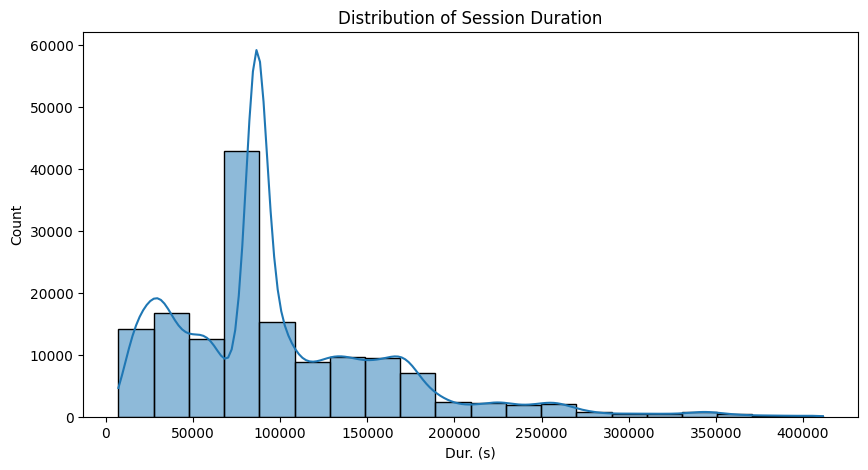

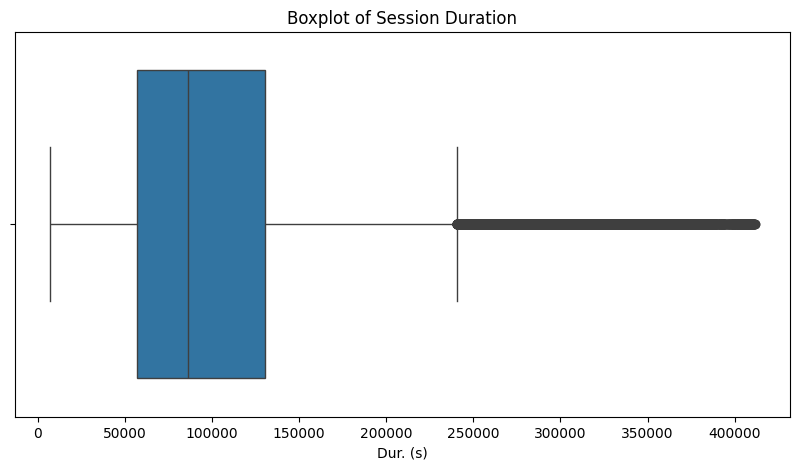

In [6]:
#  Univariate Analysis
tellCo_data.univariate_analysis()

### Bivariate Analysis Method

The `bivariate_analysis` method examines the relationship between different application download volumes and the total data volume. This helps in understanding how the usage of each application correlates with the total data volume.

#### Analysis Details:

1. **Objective:**
   - Explore the relationship between the download volumes of various applications and the `Total Data Volume`.
   - Use scatter plots to visualize these relationships and identify potential correlations.

2. **Applications Analyzed:**
   - Social Media
   - Google
   - Email
   - YouTube
   - Netflix
   - Gaming
   - Other


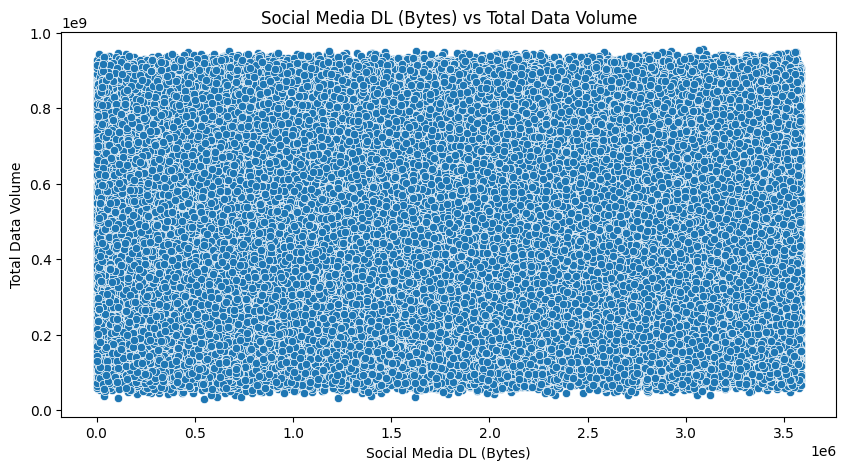

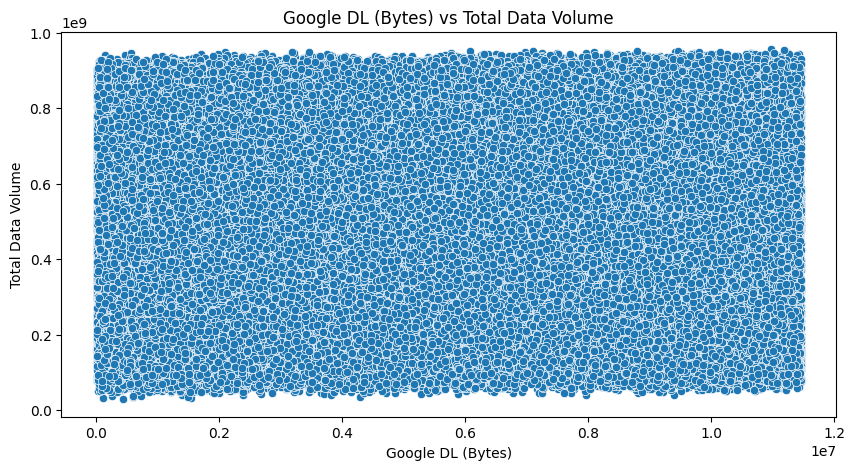

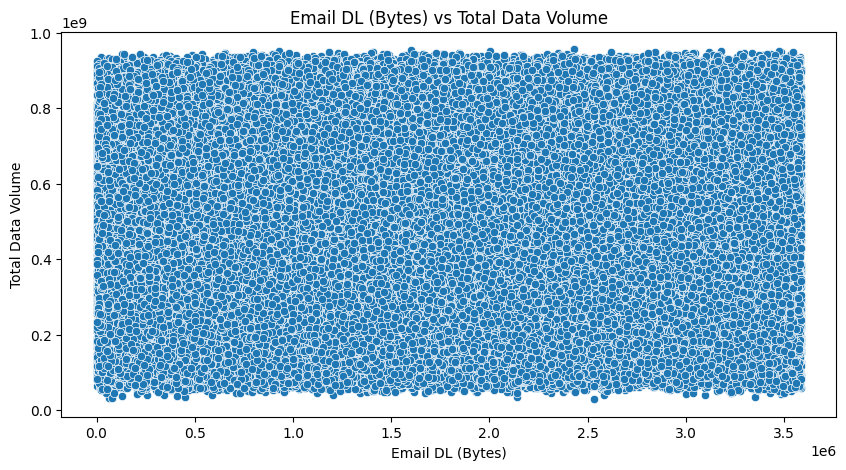

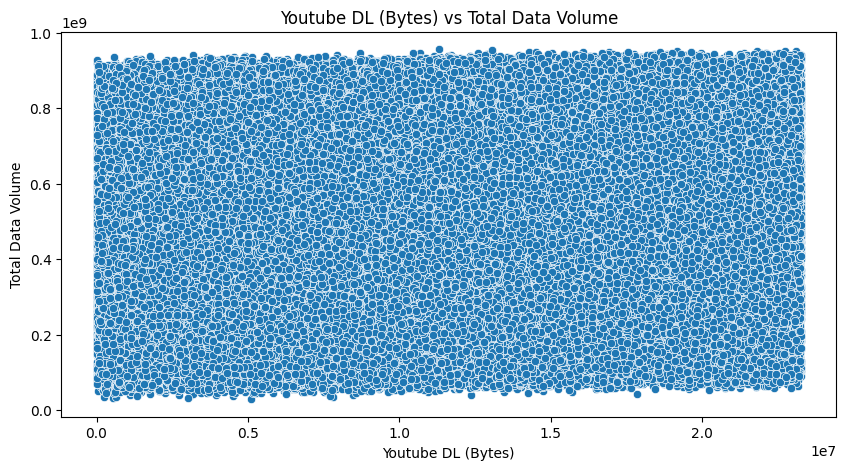

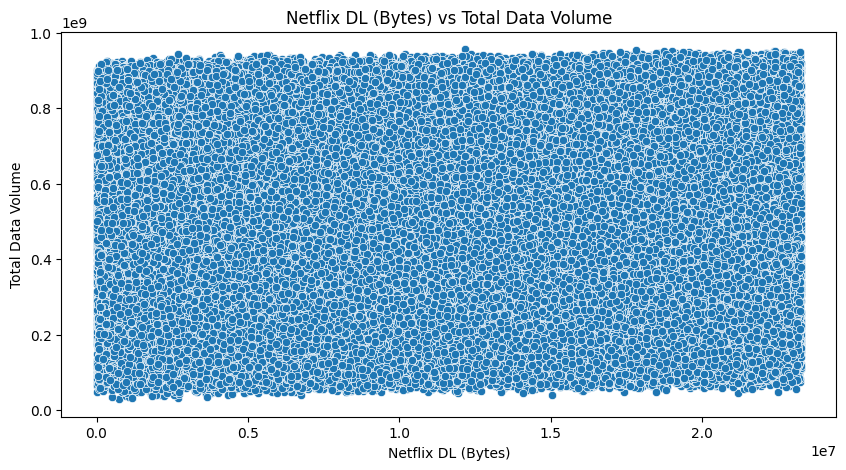

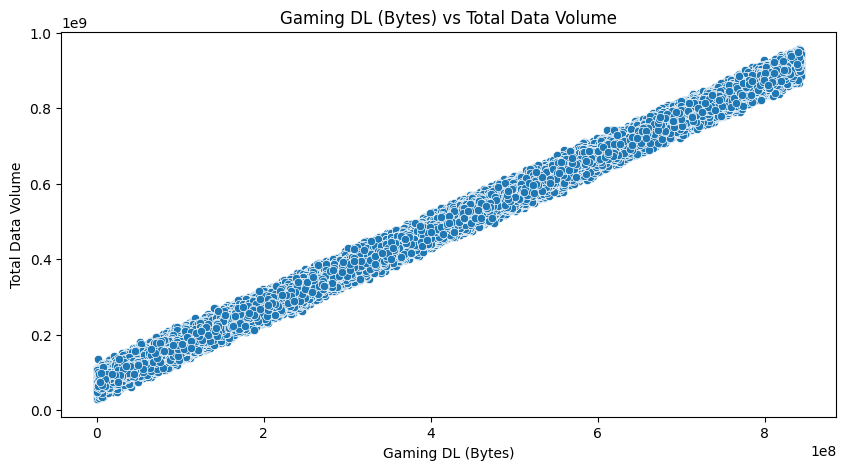

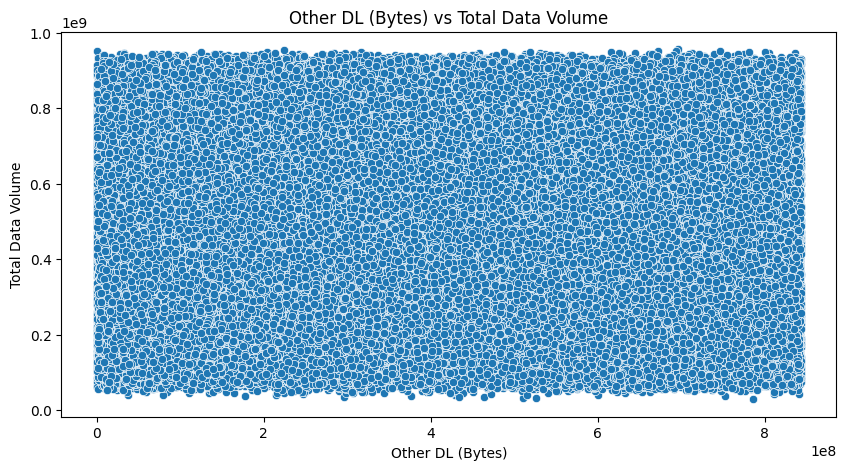

In [7]:
tellCo_data.bivariate_analysis()

### Correlation Analysis Method

The `correlation_analysis` method evaluates the correlations between the data usage of different applications. This analysis helps in understanding how the usage of one application is related to the usage of others, and it provides insights into user behavior and data consumption patterns.

#### Analysis Details:

1. **Objective:**
   - Compute and visualize the correlation matrix for the data usage of various applications.
   - Identify relationships between different applications' data usage.

2. **Applications Analyzed:**
   - Social Media
   - Google
   - Email
   - YouTube
   - Netflix
   - Gaming
   - Other

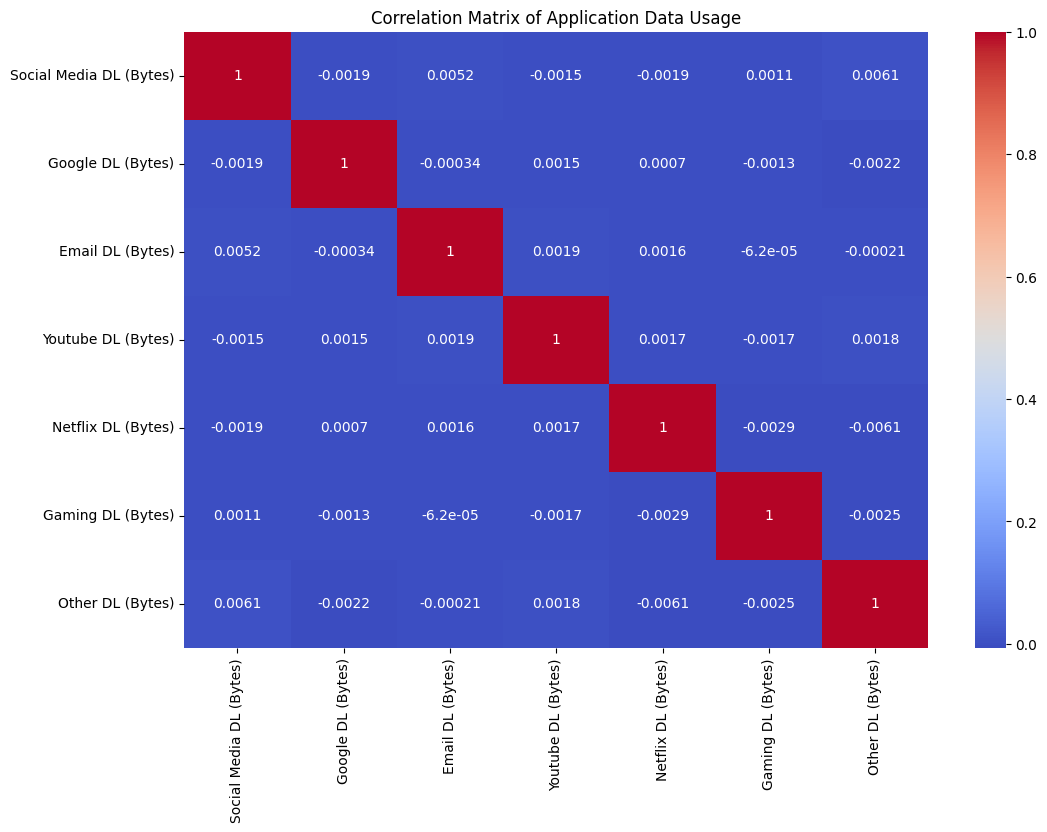

In [8]:
tellCo_data.correlation_analysis()

### Dimensionality Reduction Using PCA

The `perform_pca` method performs Principal Component Analysis (PCA) to reduce the dimensionality of the dataset, which helps in visualizing high-dimensional data in a lower-dimensional space.

#### Analysis Details:

 **Objective:**
   - Reduce the number of dimensions from the original features to 2 principal components for easier visualization and analysis.
   - Normalize the data before applying PCA to ensure each feature contributes equally to the analysis.



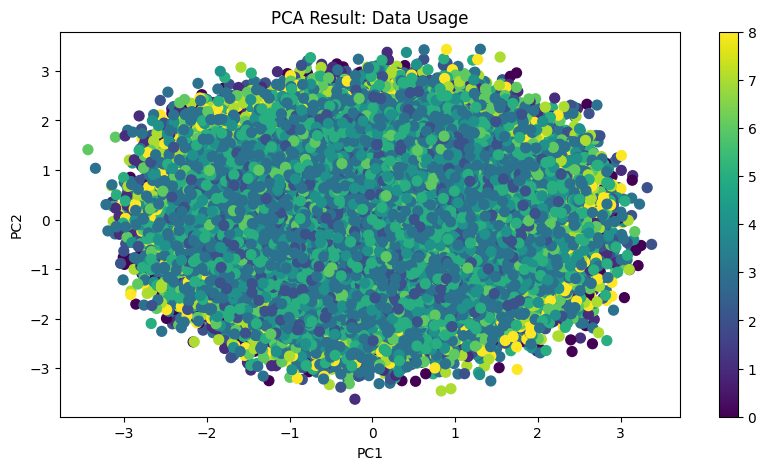

In [9]:
tellCo_data.perform_pca()